In [1]:
using ITensors
using Plots
using JLD2
using Base.Threads
using StatsBase
using HDF5
include("../sampling.jl");

In [2]:
function loadMPS(path::String; id::String="W")
    """Loads an MPS from a .h5 file. Returns and ITensor MPS."""
    file = path[end-2:end] != ".h5" ? path * ".h5" : path
    f = h5open("$file","r")
    mps = read(f, "$id", MPS)
    close(f)
    return mps
end
function sliceMPS(W::MPS, class_label::Int)
    """General function to slice the MPS and return the state corresponding to a specific class label."""
    ψ = deepcopy(W)
    decision_idx = findindex(ψ[end], "f(x)")
    decision_state = onehot(decision_idx => (class_label + 1))
    ψ[end] *= decision_state
    normalize!(ψ) # same step as before - normalise the tensor at the site with the label index instead?

    return ψ
end;

In [3]:
mps_loaded = loadMPS("mps_chi30.h5");

In [4]:
norm(mps_loaded)

1.0000000000000038

In [5]:
state0 = sliceMPS(mps_loaded, 0)
state1 = sliceMPS(mps_loaded, 1);

In [6]:
all_shots_c0 = Matrix{Float64}(undef, 5000, 100)
for i in 1:5000
    println(i)
    all_shots_c0[i, :] = sample_mps_with_contractions(state0)
end

1
Prob of sampled state: 0.4216758706139444
Trace of ρ1: 1.0000000000000138
Prob of sampled state: 0.6474199384850815
Trace of ρ2: 1.0000000000000002
Prob of sampled state: 0.7383287289634877
Trace of ρ3: 0.9999999999999998
Prob of sampled state: 0.7522607583597144
Trace of ρ4: 1.0
Prob of sampled state: 0.49197981710095107
Trace of ρ5: 0.9999999999999996
Prob of sampled state: 0.6962710435387646
Trace of ρ6: 1.0000000000000004
Prob of sampled state: 0.6965717119082702
Trace of ρ7: 1.0000000000000007
Prob of sampled state: 0.8958131347062163
Trace of ρ8: 1.0000000000000009
Prob of sampled state: 0.33582277184672166
Trace of ρ9: 0.9999999999999996
Prob of sampled state: 0.7911643527118436
Trace of ρ10: 0.9999999999999994
Prob of sampled state: 0.48495195521596446
Trace of ρ11: 1.0000000000000007
Prob of sampled state: 0.29610317445828416
Trace of ρ12: 0.9999999999999993
Prob of sampled state: 0.7038660636768425
Trace of ρ13: 0.9999999999999996
Prob of sampled state: 0.6469937271652223
T

Excessive output truncated after 524323 bytes.

Prob of sampled state: 0.5320360467076543
Trace of ρ63: 1.0000000000000002
Prob of sampled state: 0.9823870395003514
Trace of ρ64: 1.0000000000000009
Prob of sampled state: 0.3437810920891391
Trace of ρ65: 0.9999999999999989
Prob of sampled state: 0.9639753147993712
Trace of ρ66: 1.0
Prob of sampled state: 0.5352408281576897
Trace of ρ67: 1.0000000000000004
Prob of sampled state: 0.8433993781656387
Trace of ρ68: 1.0000000000000004
Prob of sampled state: 0.9948102941919625
Trace of ρ69: 0.9999999999999996
Prob of sampled state: 0.801566078452876
Trace of ρ70: 1.0000000000000007
Prob of sampled state: 0.2998925942382137
Trace of ρ71: 0.9999999999999993
Prob of sampled state: 0.8197221803202878
Trace of ρ72: 1.0000000000000009
Prob of sampled state: 0.3141965783030629
Trace of ρ73: 0.9999999999999999
Prob of sampled state: 0.49211227273075386
Trace of ρ74: 1.0000000000000004
Prob of sampled state: 0.8331697574231981
Trace of ρ75: 1.0000000000000002
Prob of sampled state: 0.789512994635272

InterruptException: InterruptException:

In [31]:
mean_ts = mean(all_shots_c0, dims=1)[1,:]
std_ts = std(all_shots_c0, dims=1)[1,:]

100-element Vector{Float64}:
 0.28955667834472276
 0.2878927671970422
 0.28820963635876823
 0.28353053894875646
 0.285316096858956
 0.2848895260616945
 0.27800593973578175
 0.2838968513881323
 0.2848324709436276
 0.27254618512560497
 ⋮
 0.2811843841771617
 0.28339024723277134
 0.2887911563194967
 0.2887287155205946
 0.29019090986033313
 0.27577939972223176
 0.29034782586842356
 0.28473021914986724
 0.2865138407330888

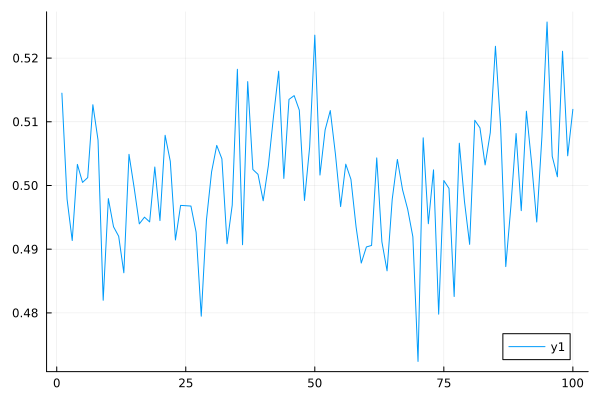

In [32]:
plot(mean_ts)

In [21]:
@load "train_chi30.jld2"

2-element Vector{Symbol}:
 :X_train_scaled
 :y_train

In [22]:
c0_idxs = findall(x -> x.== 0, y_train);
c1_idxs = findall(x -> x.== 1, y_train);
c0_samples = X_train_scaled[c0_idxs, :];
c1_samples = X_train_scaled[c1_idxs, :];

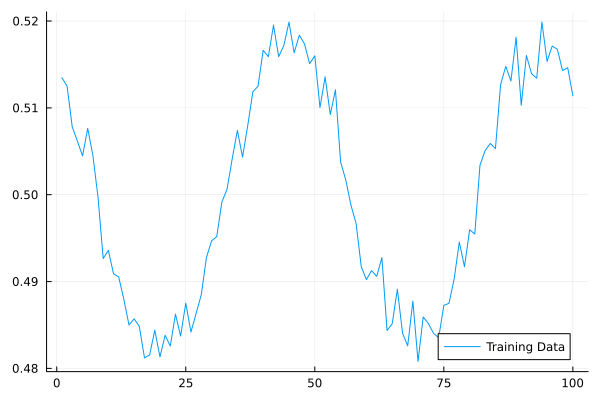

In [23]:
plot(mean(c0_samples, dims=1)[1,:], label="Training Data")